In [1]:
%run ./library/distributions_and_points_visualizations.py
%run ../utils/function_parameters.py

### Application

#### Visualize Points

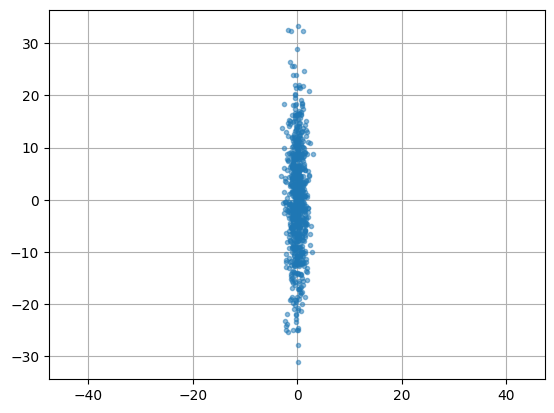

In [2]:
mean = [0, 0]
cov = [[1, 0], [0, 100]]
pts = np.random.multivariate_normal(mean, cov, size=800)

visualize_points(pts).show()

#### Visualize Distributions

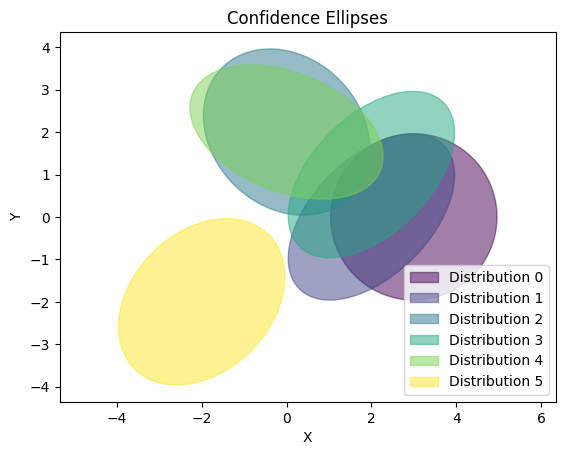

In [3]:
# each row has the values for mutlivariate normal distributions
distributions = np.array([
    [[3, 0], [1, 0], [0, 1]],
    [[2, 0], [1, 0.5], [0.5, 1]],
    [[0, 2], [1, -0.2], [-0.2, 1]],
    [[2, 1], [1, 0.5], [0.5, 1]],
    [[0, 2], [1, -1.2], [-0.2, 1]],
    [[-2, -2], [1, 0.3], [0.3, 1]]
])

plot_confidence_ellipses(distributions)[0].show()

### Visualize Distributions and Points

In [27]:
import pdb

def save_params_anonymous(func):
    def wrapper(*args, **kwargs):
        prefix = "_"
        globals().update({prefix + k: v for k, v in zip(func.__code__.co_varnames, args)})
        return func(*args, **kwargs)
    return wrapper

@save_params_anonymous
def create_ellipse_points(mean, cov, n_std=1.96, n_points=100):
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    print(eigenvalues)
    angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])
    
    t = np.linspace(0, 2*np.pi, n_points)
    ellipse_x = n_std * np.sqrt(eigenvalues[0]) * np.cos(t)
    ellipse_y = n_std * np.sqrt(eigenvalues[1]) * np.sin(t)
    
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle), np.cos(angle)]])
    
    ellipse_points = np.dot(np.column_stack([ellipse_x, ellipse_y]), R.T) + mean
    return ellipse_points[:, 0], ellipse_points[:, 1]

def plot_gmm_distributions(distributions, weights, ids, n_std=1.96):
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    
    colors = cm.tab10.colors

    max_weight_index = np.argmax(weights)
    
    for dist_index, (dist, weight, id_set) in enumerate(zip(distributions, weights, ids)):
        for idx, params in zip(id_set, dist):
            # pdb.set_trace()
            mean, cov_matrix = params[0], params[1:]
            ellipse_x, ellipse_y = create_ellipse_points(mean, cov_matrix, n_std)
            
            # Use the id to select a consistent color
            color_index = idx % len(colors)
            if dist_index == max_weight_index:
                ax.fill(ellipse_x, ellipse_y, color=colors[color_index], alpha=weight, 
                        label=f'Distribution {idx}', edgecolor='black')
            else:
                ax.fill(ellipse_x, ellipse_y, color=colors[color_index], alpha=weight, edgecolor='black')
    
    ax.legend(loc='upper right')
    ax.set_aspect('equal')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('GMM Distributions with Weights as Opacity')
    plt.grid(True)
    
    return plt

In [28]:
mean, cov = _mean, _cov
n_std = 1.96
n_points = 100

eigenvalues, eigenvectors = np.linalg.eig(cov)
angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])

t = np.linspace(0, 2*np.pi, n_points)
ellipse_x = n_std * np.sqrt(eigenvalues[0]) * np.cos(t)
ellipse_y = n_std * np.sqrt(eigenvalues[1]) * np.sin(t)

R = np.array([[np.cos(angle), -np.sin(angle)],
              [np.sin(angle), np.cos(angle)]])

ellipse_points = np.dot(np.column_stack([ellipse_x, ellipse_y]), R.T) + mean

In [34]:
eigenvalues

array([1., 1.])

[1. 1.]


ValueError: operands could not be broadcast together with shapes (40,2) (100,) 

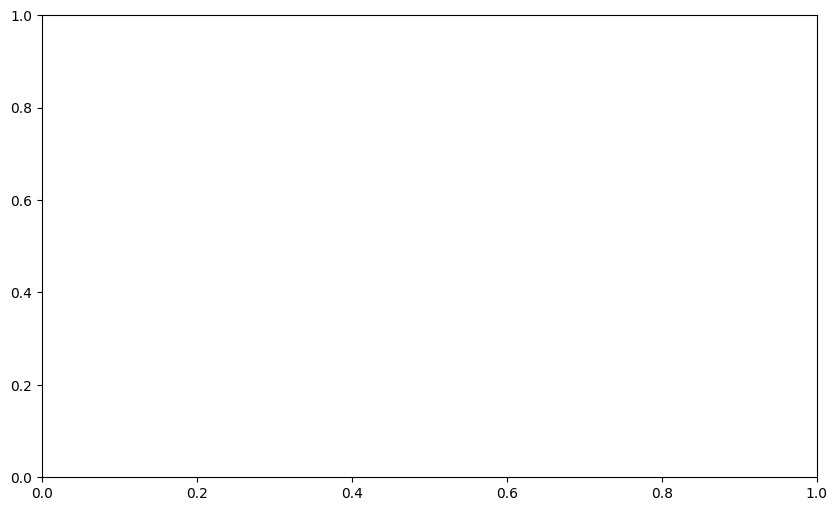

In [29]:
points = np.random.uniform(-10, 10, (40, 2))

# observation 1
distributions_a = np.array([
    [[3, 4], [1, 0], [0, 1]],
    [[2, 0], [1, 0], [0, 1]]
])

# observation 2
distributions_b = np.array([
    [[4, 4], [1, 0], [0, 1]],
    [[3, 0], [1, 0], [0, 1]]
])

# observation 3
distributions_c = np.array([
    # [[4, 0], [1, 0], [0, 1]],
    # [[5, 4], [1, 0], [0, 1]]
    [[4, 0], [1, 0], [0, 1]],
    [[5, 4], [1, 0], [0, 1]]
])

# distributions = [distributions_a, distributions_b, distributions_c]
distributions = [distributions_a]

# iteration 1: 0.6, iteration 2: 0.3, iteration 3: 0.1
weights = [0.7, 0.2, 0.1]

# ids = [
#     [0, 1],
#     [0, 1],
#     [1, 0]
#     # [0, 1]
# ]

ids = [[0, 1]]

plt = plot_gmm_distributions(distributions, weights, ids, points)
plt.show()

### Visualize Distributions and Points with mapping